In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1. Descripción del dataset

In [2]:
#Importamos el dataset sobre el que trabajaremos
data = pd.read_csv('BankChurners.csv')

#Revisamos sus primeras líneas
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# Revisamos la estructura general del dataset
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
# Modificaremos los datos de la variable Income_Category porque vemos que tienen algún caracter raro

data.replace({'$60K - $80K':'60K-80K', 'Less than $40K':'-40K', '$80K - $120K':'80K-120K', 
              '$40K - $60K':'40K-60K','$120K +':'+120K'}, inplace=True)


## 2. Integración y selección de los datos

In [6]:
# Primero debemos deshacernos de las columnas que no son necesarias para el estudio del dataset

datos = data.drop(['CLIENTNUM','Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 
                    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
                   ], axis=1)

## 3. Limpieza de los datos

### 3.1. ¿Los datos contienen ceros o elementos vacíos? 

In [7]:
# Revisamos si hay datos nulos 

datos.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
# Revisamos que no haya datos mal escritos o incorrectos (basándonos en la explicacion del dataset https://www.kaggle.com/sakshigoyal7/credit-card-customers)
    
for i in datos.columns:
    print(datos[i].name)
    print(len(datos[i].unique()), datos[i].unique())

Attrition_Flag
2 ['Existing Customer' 'Attrited Customer']
Customer_Age
45 [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
Gender
2 ['M' 'F']
Dependent_count
6 [3 5 4 2 0 1]
Education_Level
7 ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status
4 ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category
6 ['60K-80K' '-40K' '80K-120K' '40K-60K' '+120K' 'Unknown']
Card_Category
4 ['Blue' 'Gold' 'Silver' 'Platinum']
Months_on_book
44 [39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
Total_Relationship_Count
6 [5 6 4 3 2 1]
Months_Inactive_12_mon
7 [1 4 2 3 6 0 5]
Contacts_Count_12_mon
7 [3 2 0 1 4 5 6]
Credit_Limit
6205 [12691.  8256.  3418. ...  5409.  5281. 10388.]
Total_Revolving_Bal
1974 [ 777  864    0 ...  534  476 2241]
Avg_Open_To_Buy
6813 [11914.  7392.  341

In [9]:
# Revisamos si hay duplicados

duplicados = datos.duplicated() 
duplicados.sum()

0

### 3.2. Identificación y tratamiento de valores extremos.

In [10]:
# Descartamos los outilers con el método del z-score
# Dividimos las columnas del dataset en numéricas y categóricas

num_datos = datos.select_dtypes(include=["number"])
cat_datos = datos.select_dtypes(exclude=["number"])

outliers_row = np.all(stats.zscore(num_datos) < 3, axis=1)

datos_cleaned = pd.concat([num_datos.loc[outliers_row], cat_datos.loc[outliers_row]], axis=1)

In [11]:
datos_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9560 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              9560 non-null   int64  
 1   Dependent_count           9560 non-null   int64  
 2   Months_on_book            9560 non-null   int64  
 3   Total_Relationship_Count  9560 non-null   int64  
 4   Months_Inactive_12_mon    9560 non-null   int64  
 5   Contacts_Count_12_mon     9560 non-null   int64  
 6   Credit_Limit              9560 non-null   float64
 7   Total_Revolving_Bal       9560 non-null   int64  
 8   Avg_Open_To_Buy           9560 non-null   float64
 9   Total_Trans_Amt           9560 non-null   int64  
 10  Total_Trans_Ct            9560 non-null   int64  
 11  Avg_Utilization_Ratio     9560 non-null   float64
 12  Attrition_Flag            9560 non-null   object 
 13  Gender                    9560 non-null   object 
 14  Educati

## 4. Análisis de los datos

In [12]:
# Hacemos grupos para luego analizarlos y compararlos

# Agrupación por sexo
datos_cleaned.mujer = datos_cleaned[datos_cleaned['Gender'] == "F"]
datos_cleaned.hombre = datos_cleaned[datos_cleaned['Gender'] == "M"]

# Agrupación por tipo de cliente
datos_cleaned.existente = datos_cleaned[datos_cleaned['Attrition_Flag'] == "Existing Customer"]
datos_cleaned.abandonado = datos_cleaned[datos_cleaned['Attrition_Flag'] == "Attrited Customer"]

# Agrupación por tipo de tarjeta
datos_cleaned.azul = datos_cleaned[datos_cleaned['Card_Category'] == "Blue"]
datos_cleaned.oro = datos_cleaned[datos_cleaned['Card_Category'] == "Gold"]
datos_cleaned.plata = datos_cleaned[datos_cleaned['Card_Category'] == "Silver"]
datos_cleaned.platino = datos_cleaned[datos_cleaned['Card_Category'] == "Platinum"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__'

In [13]:
#Vemos las agrupaciones que hemos hecho

# Agrupación por sexo
print("\n______________Agrupación por sexo_______________")
print("Hombres: ", datos_cleaned.hombre.shape[0])
print("Mujeres: ", datos_cleaned.mujer.shape[0])

# Agrupación por tipo de cliente            
print("\n______________Agrupación por cliente_______________")
print("Clientes existentes: ", datos_cleaned.existente.shape[0])
print("Clientes que se han ido: ", datos_cleaned.abandonado.shape[0])
# Agrupación por tipo de tarjeta            
print("\n______________Agrupación por tipo de tarjeta _______________")
print("Tarjeta azul: ", datos_cleaned.azul.shape[0])
print("Tarjeta oro: ", datos_cleaned.oro.shape[0])
print("Tarjeta plata: ", datos_cleaned.plata.shape[0])
print("Tarjeta platino: ", datos_cleaned.platino.shape[0])


______________Agrupación por sexo_______________
Hombres:  4443
Mujeres:  5117

______________Agrupación por cliente_______________
Clientes existentes:  8005
Clientes que se han ido:  1555

______________Agrupación por tipo de tarjeta _______________
Tarjeta azul:  8966
Tarjeta oro:  96
Tarjeta plata:  481
Tarjeta platino:  17


Existing Customer    8005
Attrited Customer    1555
Name: Attrition_Flag, dtype: int64


<AxesSubplot:>

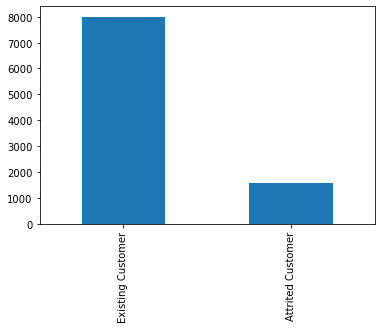

In [14]:
#Vamos a ver que cantidad de consumidores siguen existiendo, y cuánto se han ido de la entidad.
x=pd.value_counts(datos_cleaned["Attrition_Flag"])
print(x)
x.plot.bar(figsize=(6,4))


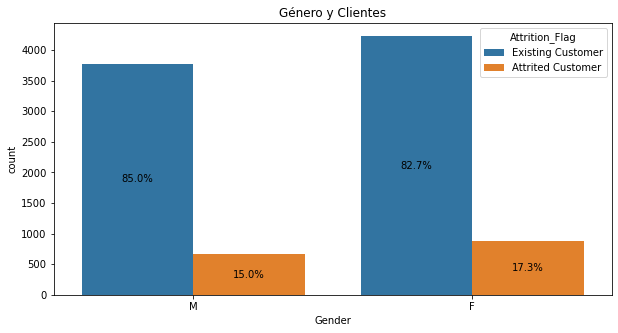

In [15]:
#Para poder ver que cantidad de clientes existentes y clientes que se han ido de la entidad tenemos, realizamos un gráfico para cada variable
plt.figure(figsize=(10,5))
plot=sns.countplot(x=datos_cleaned.Gender,hue=datos_cleaned.Attrition_Flag)
plt.title("Género y Clientes")

total_mujer = len(datos_cleaned.mujer)
total_hombre = len(datos_cleaned.hombre)
i = 0
for p in plot.patches:
    if (i % 2 == 0):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_hombre)
    else:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_mujer) 
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()/2
    plot.annotate(percentage, (x, y), horizontalalignment='center', verticalalignment='center')
    i+=1
        
plt.show()       

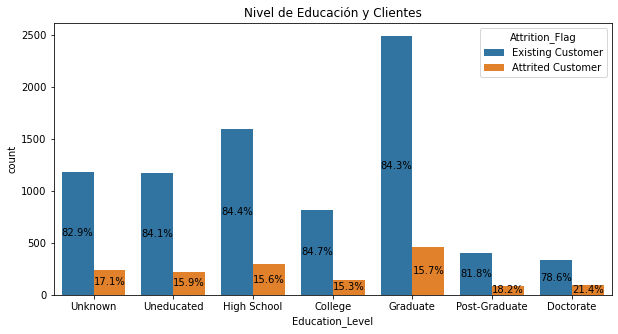

In [16]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=datos_cleaned.Education_Level,hue=datos_cleaned.Attrition_Flag,
                   order=['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'])
plt.title("Nivel de Educación y Clientes")

total_Unknown = len(datos_cleaned[datos_cleaned['Education_Level'] == "Unknown"])
total_Uneducated = len(datos_cleaned[datos_cleaned['Education_Level'] == "Uneducated"])
total_High_School = len(datos_cleaned[datos_cleaned['Education_Level'] == "High School"])
total_College = len(datos_cleaned[datos_cleaned['Education_Level'] == "College"])
total_Graduate = len(datos_cleaned[datos_cleaned['Education_Level'] == "Graduate"])
total_Post_Graduate = len(datos_cleaned[datos_cleaned['Education_Level'] == "Post-Graduate"])
total_Doctorate = len(datos_cleaned[datos_cleaned['Education_Level'] == "Doctorate"])
i = 0
for p in plot.patches:
    if (i == 0 or i == 7):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_Unknown)
    elif (i == 1 or i == 8):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_Uneducated)
    elif (i == 2 or i == 9):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_High_School)
    elif (i == 3 or i == 10):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_College)
    elif (i == 4 or i == 11):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_Graduate)
    elif (i == 5 or i == 12):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_Post_Graduate)
    else:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_Doctorate) 
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()/2
    plot.annotate(percentage, (x, y), horizontalalignment='center', verticalalignment='center')
    i+=1
    
plt.show()

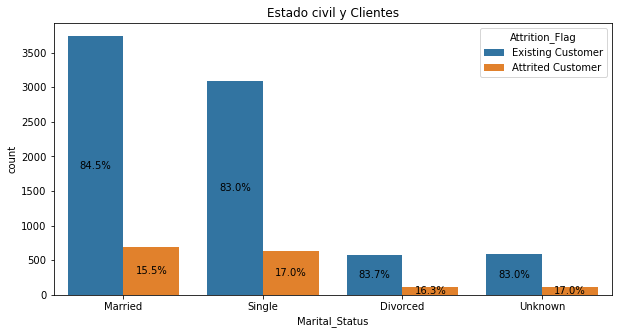

In [17]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=datos_cleaned.Marital_Status,hue=datos_cleaned.Attrition_Flag,
                  order=['Married', 'Single', 'Divorced','Unknown'])
plt.title("Estado civil y Clientes")

total_married = len(datos_cleaned[datos_cleaned['Marital_Status'] == "Married"])
total_single = len(datos_cleaned[datos_cleaned['Marital_Status'] == "Single"])
total_divorced = len(datos_cleaned[datos_cleaned['Marital_Status'] == "Divorced"])
total_unknown = len(datos_cleaned[datos_cleaned['Marital_Status'] == "Unknown"])
i = 0
for p in plot.patches:
    if (i == 0 or i == 4):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_married)
    elif (i == 1 or i == 5):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_single)
    elif (i == 2 or i == 6):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_divorced)
    else:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_unknown) 
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()/2
    plot.annotate(percentage, (x, y), horizontalalignment='center', verticalalignment='center')
    i+=1

plt.show()

No hay una distinción dependiendo del estado civil del cliente.

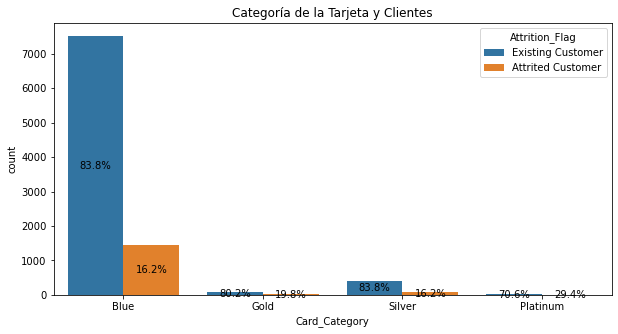

In [18]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=datos_cleaned.Card_Category,hue=datos_cleaned.Attrition_Flag)
plt.title("Categoría de la Tarjeta y Clientes")

total_azul = len(datos_cleaned.azul)
total_oro = len(datos_cleaned.oro)
total_plata = len(datos_cleaned.plata)
total_platino = len(datos_cleaned.platino)
i = 0
for p in plot.patches:
    if (i == 0 or i == 4):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_azul)
    elif (i == 1 or i == 5):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_oro)
    elif (i == 2 or i == 6):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_plata)
    else:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_platino) 
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()/2
    plot.annotate(percentage, (x, y), horizontalalignment='center', verticalalignment='center')
    i+=1

plt.show()

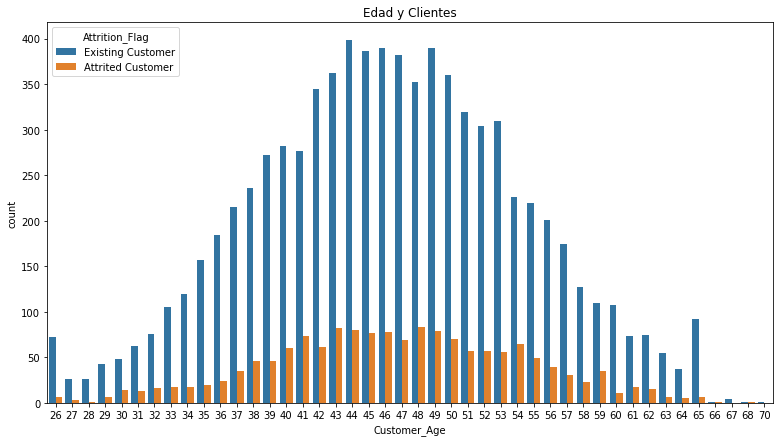

In [19]:
plt.figure(figsize=(13,7))
plot=sns.countplot(x=datos_cleaned.Customer_Age,hue=datos_cleaned.Attrition_Flag)
plt.title("Edad y Clientes")
plt.show()

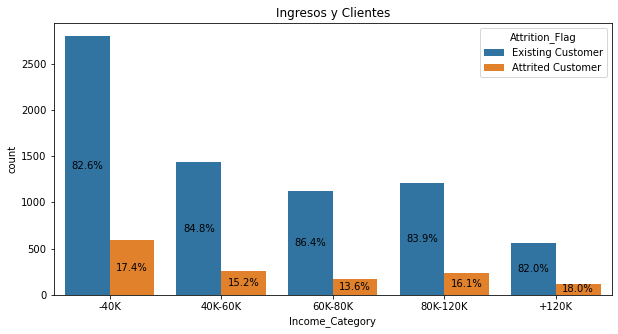

In [20]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=datos_cleaned.Income_Category,hue=datos_cleaned.Attrition_Flag, 
                   order=['-40K','40K-60K','60K-80K','80K-120K','+120K'])
plt.title("Ingresos y Clientes")

total_40K = len(datos_cleaned[datos_cleaned['Income_Category'] == "-40K"])
total_40K_60K = len(datos_cleaned[datos_cleaned['Income_Category'] == "40K-60K"])
total_60K_80K = len(datos_cleaned[datos_cleaned['Income_Category'] == "60K-80K"])
total_80K_120K = len(datos_cleaned[datos_cleaned['Income_Category'] == "80K-120K"])
total_120K = len(datos_cleaned[datos_cleaned['Income_Category'] == "+120K"])
i = 0
for p in plot.patches:
    if (i == 0 or i == 5):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_40K)
    elif (i == 1 or i == 6):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_40K_60K)
    elif (i == 2 or i == 7):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_60K_80K)
    elif (i == 3 or i == 8):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_80K_120K)
    else:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_120K) 
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()/2
    plot.annotate(percentage, (x, y), horizontalalignment='center', verticalalignment='center')
    i+=1

plt.show()

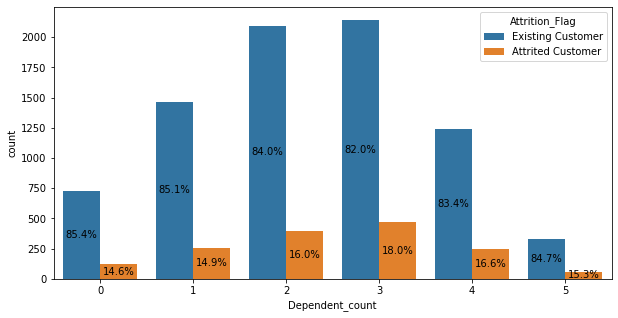

In [21]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=datos_cleaned.Dependent_count,hue=datos_cleaned.Attrition_Flag)

total_0 = len(datos_cleaned[datos_cleaned['Dependent_count'] == 0])
total_1 = len(datos_cleaned[datos_cleaned['Dependent_count'] == 1])
total_2 = len(datos_cleaned[datos_cleaned['Dependent_count'] == 2])
total_3 = len(datos_cleaned[datos_cleaned['Dependent_count'] == 3])
total_4 = len(datos_cleaned[datos_cleaned['Dependent_count'] == 4])
total_5 = len(datos_cleaned[datos_cleaned['Dependent_count'] == 5])
i = 0
for p in plot.patches:
    if (i == 0 or i == 6):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_0)
    elif (i == 1 or i == 7):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    elif (i == 2 or i == 8):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_2)
    elif (i == 3 or i == 9):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_3)
    elif (i == 4 or i == 10):
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_4)
    else:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_5) 
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()/2
    plot.annotate(percentage, (x, y), horizontalalignment='center', verticalalignment='center')
    i+=1

plt.show()

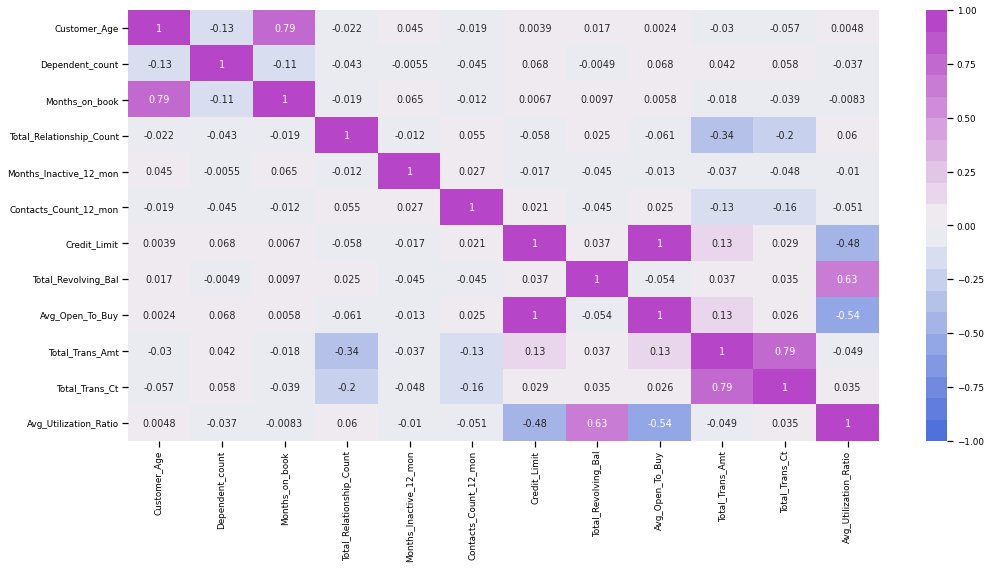

In [28]:
# Vamos a revisar la correlación de las variables numéricas entre si, con intención de no utilizar tantas variables para nuestro modelo.
plt.figure(figsize=(15,8))
sns.set_context(context='notebook',font_scale=.8)
sns.heatmap(datos_cleaned.corr(method='pearson'),cmap=sns.diverging_palette(260, 300, n=20),annot=True,vmin = -1, vmax = 1)
plt.tight_layout()

Según los resultados deberiamos eliminar Avg_Open_to_Buy, Total_Trans_Amt y Total_Revolving_Bal

In [48]:
#Para poder clasificar las columnas necesitamos que todas las columnas sean numéricas, por lo que vamos a codificar las variable categóricas:
data_num = pd.get_dummies(datos_cleaned, columns=['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'],drop_first=True)

data_num.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_-40K,Income_Category_40K-60K,Income_Category_60K-80K,Income_Category_80K-120K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
count,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,...,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000
mean,46.360669,2.349477,35.963075,3.862029,2.297176,2.441213,8417.477406,1157.367364,7260.110042,3957.733159,...,0.390377,0.073954,0.354498,0.176674,0.136192,0.150941,0.110356,0.010042,0.001778,0.050314
std,8.002016,1.295917,7.949916,1.542677,0.930402,1.079871,8951.488151,816.042039,8958.310762,2614.715565,...,0.487860,0.261710,0.478386,0.381412,0.343011,0.358010,0.313349,0.099710,0.042134,0.218603
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2506.000000,278.000000,1245.000000,2109.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4396.500000,1271.000000,3326.000000,3814.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10683.500000,1779.000000,9491.000000,4636.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,70.000000,5.000000,56.000000,6.000000,5.000000,5.000000,34516.000000,2517.000000,34516.000000,14593.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
data_num.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio', 'Attrition_Flag_Existing Customer', 'Gender_M',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_-40K',
       'Income_Category_40K-60K', 'Income_Category_60K-80K',
       'Income_Category_80K-120K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [39]:
# Aplicamos el método de regresión logistica para poder clasificar nuestro sistema:
# Borramos la que queremos clasificar (Attrition_Flag_Existing Customer) y las que hemos considerado que
# no son necesarias tras calcular la correlación entre las variables:

X = np.array(data_num.drop(['Attrition_Flag_Existing Customer','Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Revolving_Bal'],1))
y = np.array(data_num['Attrition_Flag_Existing Customer'])
X.shape

(9560, 27)

In [53]:
# Vamos a crear el modelo, haciendo fit al conjunto de datos de entrada X y de salida Y
model = linear_model.LogisticRegression(C=1000,max_iter=50000)
model.fit(X,y)

LogisticRegression(C=1000, max_iter=50000)

In [54]:
#Clasificamos el conjuunto de entradas X, con el metodo predict.
predictions = model.predict(X)
print(predictions)

[1 1 1 ... 1 1 1]


In [55]:
print("Precision media de las predicciones: ")
model.score(X,y)

Precision media de las predicciones: 


0.8746861924686192

Confirmamos que nuestro modelo es bastante bueno, teniendo una precisión del 87.46%.
Para poder validar el modelo, vamos a subdividir el conjunto de datos de entrada en un set de entrenamiento, y otro de validación (test)
La subdivision elegida es 80% para entrenamiento y 20% para test.

In [59]:
from sklearn import model_selection
validation_size=0.20
seed=7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [60]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
resultados = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

print("Datos de entrenamiento:\n")
print("{:.3f}".format(resultados.mean()))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Datos de entrenamiento:

0.871


Con los datos de entrenamiento, nos da una precision del 87.1% (80% de los datos).
Vamos a calcularlo con el 20% de los datos de test

In [61]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.8702928870292888


En este caso, la muestra es menor, y la precisión es algo menor también, aunque sigue siendo una precisión del modelo bastante alta (87.02%).
Para ver cuantos resultados equivocados ha predecido de cada clase, realizamos la matriz de confusion. Todos los valores que no se encuentran en la diagonal, son valores confundidos,
es decir, hay 192 valores  que los predijo como Existing, y eran Attrited, y por el contrario 56 que eran Existing, los predijo como Attrited.

Existing 1
Attrited 0

In [62]:
print(confusion_matrix(Y_test, predictions))

[[ 127  192]
 [  56 1537]]
